In [1]:
#*Import necessary packages
#pip install pycountry
import requests
import pandas as pd
import pycountry
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#*Url's to load data
obs_adturl ="https://ghoapi.azureedge.net/api/NCD_BMI_30C"
obs_chlurl ="https://ghoapi.azureedge.net/api/NCD_BMI_PLUS2C"
mn_adturl ="https://ghoapi.azureedge.net/api/NCD_BMI_18C"
mn_chlurl ="https://ghoapi.azureedge.net/api/NCD_BMI_MINUS2C"

# Obesity Dataframe Setup

## Obesity Adult Dataframe Setup

In [3]:
# Send a GET request and Parse the JSON content of the response into a Python dictionary  - Obs Adult URL
response=requests.get(obs_adturl)
obs_adtdata=response.json()
obs_adtdata.keys()

dict_keys(['@odata.context', 'value'])

In [4]:
#Create Obesity_Adult Dataframe
df_obsadult=pd.DataFrame(obs_adtdata['value'])
df_obsadult.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,TimeDim,Dim1,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,6120316,NCD_BMI_30C,GLOBAL,GLOBAL,YEAR,None,None,SEX,2010,SEX_BTSX,...,None,11.4 [11.3-11.5],11.380755,11.260705,11.498690,None,2024-02-29T16:06:41.017+01:00,2010,2010-01-01T00:00:00+01:00,2010-12-31T00:00:00+01:00
1,6121380,NCD_BMI_30C,COUNTRY,KHM,YEAR,WPR,Western Pacific,SEX,2014,SEX_BTSX,...,None,2.5 [2.1-2.9],2.470646,2.105896,2.886291,None,2024-02-29T16:06:41.017+01:00,2014,2014-01-01T00:00:00+01:00,2014-12-31T00:00:00+01:00
2,6122080,NCD_BMI_30C,COUNTRY,DOM,YEAR,AMR,Americas,SEX,2009,SEX_MLE,...,None,15.2 [13.4-17.1],15.204914,13.391395,17.116220,None,2024-02-29T16:06:41.017+01:00,2009,2009-01-01T00:00:00+01:00,2009-12-31T00:00:00+01:00
3,6122475,NCD_BMI_30C,COUNTRY,JOR,YEAR,EMR,Eastern Mediterranean,SEX,2004,SEX_BTSX,...,None,28.7 [27.2-30.2],28.686079,27.179471,30.238941,None,2024-02-29T16:06:41.017+01:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00
4,6122855,NCD_BMI_30C,COUNTRY,VNM,YEAR,WPR,Western Pacific,SEX,2012,SEX_BTSX,...,None,0.8 [0.7-0.9],0.818540,0.714215,0.930910,None,2024-02-29T16:06:41.017+01:00,2012,2012-01-01T00:00:00+01:00,2012-12-31T00:00:00+01:00


In [5]:
df_obsadult.dtypes

Id                      int64
IndicatorCode          object
SpatialDimType         object
SpatialDim             object
TimeDimType            object
ParentLocationCode     object
ParentLocation         object
Dim1Type               object
TimeDim                 int64
Dim1                   object
Dim2Type               object
Dim2                   object
Dim3Type               object
Dim3                   object
DataSourceDimType      object
DataSourceDim          object
Value                  object
NumericValue          float64
Low                   float64
High                  float64
Comments               object
Date                   object
TimeDimensionValue     object
TimeDimensionBegin     object
TimeDimensionEnd       object
dtype: object

In [6]:
#Add a new column age_group with value Adults
df_obsadult['Age_Group']='Adults'
df_obsadult.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,TimeDim,Dim1,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,Age_Group
0,6120316,NCD_BMI_30C,GLOBAL,GLOBAL,YEAR,None,None,SEX,2010,SEX_BTSX,...,11.4 [11.3-11.5],11.380755,11.260705,11.498690,None,2024-02-29T16:06:41.017+01:00,2010,2010-01-01T00:00:00+01:00,2010-12-31T00:00:00+01:00,Adults
1,6121380,NCD_BMI_30C,COUNTRY,KHM,YEAR,WPR,Western Pacific,SEX,2014,SEX_BTSX,...,2.5 [2.1-2.9],2.470646,2.105896,2.886291,None,2024-02-29T16:06:41.017+01:00,2014,2014-01-01T00:00:00+01:00,2014-12-31T00:00:00+01:00,Adults
2,6122080,NCD_BMI_30C,COUNTRY,DOM,YEAR,AMR,Americas,SEX,2009,SEX_MLE,...,15.2 [13.4-17.1],15.204914,13.391395,17.116220,None,2024-02-29T16:06:41.017+01:00,2009,2009-01-01T00:00:00+01:00,2009-12-31T00:00:00+01:00,Adults
3,6122475,NCD_BMI_30C,COUNTRY,JOR,YEAR,EMR,Eastern Mediterranean,SEX,2004,SEX_BTSX,...,28.7 [27.2-30.2],28.686079,27.179471,30.238941,None,2024-02-29T16:06:41.017+01:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00,Adults
4,6122855,NCD_BMI_30C,COUNTRY,VNM,YEAR,WPR,Western Pacific,SEX,2012,SEX_BTSX,...,0.8 [0.7-0.9],0.818540,0.714215,0.930910,None,2024-02-29T16:06:41.017+01:00,2012,2012-01-01T00:00:00+01:00,2012-12-31T00:00:00+01:00,Adults


## Obesity Children Dataframe Setup

In [7]:
# Send a GET request and Parse the JSON content of the response into a Python dictionary  - Obs Children URL
response=requests.get(obs_chlurl)
obs_chldata=response.json()
obs_chldata.keys()

dict_keys(['@odata.context', 'value'])

In [8]:
#Create Obesity_Child Dataframe
df_obschild=pd.DataFrame(obs_chldata['value'])
df_obschild.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,Dim1,TimeDim,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,6120195,NCD_BMI_PLUS2C,COUNTRY,BRB,YEAR,AMR,Americas,SEX,SEX_FMLE,2013,...,None,18.2 [8.5-30.2],18.175685,8.463846,30.156687,None,2024-02-29T16:06:41.017+01:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00
1,6120329,NCD_BMI_PLUS2C,REGION,SEAR,YEAR,None,None,SEX,SEX_BTSX,1994,...,None,0.5 [0.4-0.6],0.462440,0.378530,0.564085,None,2024-05-23T13:28:38.2+02:00,1994,1994-01-01T00:00:00+01:00,1994-12-31T00:00:00+01:00
2,6120362,NCD_BMI_PLUS2C,COUNTRY,ATG,YEAR,AMR,Americas,SEX,SEX_BTSX,2013,...,None,17.9 [12.8-23.5],17.915575,12.771550,23.455685,None,2024-02-29T16:06:41.017+01:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00
3,6120627,NCD_BMI_PLUS2C,COUNTRY,CAF,YEAR,AFR,Africa,SEX,SEX_BTSX,1996,...,None,1.2 [0.2-3.7],1.206915,0.188633,3.724073,None,2024-02-29T16:06:41.017+01:00,1996,1996-01-01T00:00:00+01:00,1996-12-31T00:00:00+01:00
4,6120876,NCD_BMI_PLUS2C,COUNTRY,ZAF,YEAR,AFR,Africa,SEX,SEX_FMLE,2017,...,None,9.4 [7.7-11.2],9.353665,7.729730,11.194263,None,2024-02-29T16:06:41.017+01:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00


In [9]:
#Add a new column age_group with value Children
df_obschild['Age_Group']='Children'
df_obschild.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,Dim1,TimeDim,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,Age_Group
0,6120195,NCD_BMI_PLUS2C,COUNTRY,BRB,YEAR,AMR,Americas,SEX,SEX_FMLE,2013,...,18.2 [8.5-30.2],18.175685,8.463846,30.156687,None,2024-02-29T16:06:41.017+01:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00,Children
1,6120329,NCD_BMI_PLUS2C,REGION,SEAR,YEAR,None,None,SEX,SEX_BTSX,1994,...,0.5 [0.4-0.6],0.462440,0.378530,0.564085,None,2024-05-23T13:28:38.2+02:00,1994,1994-01-01T00:00:00+01:00,1994-12-31T00:00:00+01:00,Children
2,6120362,NCD_BMI_PLUS2C,COUNTRY,ATG,YEAR,AMR,Americas,SEX,SEX_BTSX,2013,...,17.9 [12.8-23.5],17.915575,12.771550,23.455685,None,2024-02-29T16:06:41.017+01:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00,Children
3,6120627,NCD_BMI_PLUS2C,COUNTRY,CAF,YEAR,AFR,Africa,SEX,SEX_BTSX,1996,...,1.2 [0.2-3.7],1.206915,0.188633,3.724073,None,2024-02-29T16:06:41.017+01:00,1996,1996-01-01T00:00:00+01:00,1996-12-31T00:00:00+01:00,Children
4,6120876,NCD_BMI_PLUS2C,COUNTRY,ZAF,YEAR,AFR,Africa,SEX,SEX_FMLE,2017,...,9.4 [7.7-11.2],9.353665,7.729730,11.194263,None,2024-02-29T16:06:41.017+01:00,2017,2017-01-01T00:00:00+01:00,2017-12-31T00:00:00+01:00,Children


## Obesity Merge Dataframes & Cleanup

In [10]:
#Combine the two obesity datasets into one dataframe called df_obesity
df_obesity = pd.concat([df_obsadult, df_obschild])
df_obesity.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,TimeDim,Dim1,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,Age_Group
0,6120316,NCD_BMI_30C,GLOBAL,GLOBAL,YEAR,None,None,SEX,2010,SEX_BTSX,...,11.4 [11.3-11.5],11.380755,11.260705,11.498690,None,2024-02-29T16:06:41.017+01:00,2010,2010-01-01T00:00:00+01:00,2010-12-31T00:00:00+01:00,Adults
1,6121380,NCD_BMI_30C,COUNTRY,KHM,YEAR,WPR,Western Pacific,SEX,2014,SEX_BTSX,...,2.5 [2.1-2.9],2.470646,2.105896,2.886291,None,2024-02-29T16:06:41.017+01:00,2014,2014-01-01T00:00:00+01:00,2014-12-31T00:00:00+01:00,Adults
2,6122080,NCD_BMI_30C,COUNTRY,DOM,YEAR,AMR,Americas,SEX,2009,SEX_MLE,...,15.2 [13.4-17.1],15.204914,13.391395,17.116220,None,2024-02-29T16:06:41.017+01:00,2009,2009-01-01T00:00:00+01:00,2009-12-31T00:00:00+01:00,Adults
3,6122475,NCD_BMI_30C,COUNTRY,JOR,YEAR,EMR,Eastern Mediterranean,SEX,2004,SEX_BTSX,...,28.7 [27.2-30.2],28.686079,27.179471,30.238941,None,2024-02-29T16:06:41.017+01:00,2004,2004-01-01T00:00:00+01:00,2004-12-31T00:00:00+01:00,Adults
4,6122855,NCD_BMI_30C,COUNTRY,VNM,YEAR,WPR,Western Pacific,SEX,2012,SEX_BTSX,...,0.8 [0.7-0.9],0.818540,0.714215,0.930910,None,2024-02-29T16:06:41.017+01:00,2012,2012-01-01T00:00:00+01:00,2012-12-31T00:00:00+01:00,Adults


In [11]:
#Filter df_obesity dataset to include only records from the years 2012 to 2022 

df_filtered = df_obesity.loc[(df_obesity['TimeDim'] >= 2012)
                     & (df_obesity['TimeDim'] <= 2022)]
# Display
df_filtered.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,TimeDimType,ParentLocationCode,ParentLocation,Dim1Type,TimeDim,Dim1,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,Age_Group
1,6121380,NCD_BMI_30C,COUNTRY,KHM,YEAR,WPR,Western Pacific,SEX,2014,SEX_BTSX,...,2.5 [2.1-2.9],2.470646,2.105896,2.886291,None,2024-02-29T16:06:41.017+01:00,2014,2014-01-01T00:00:00+01:00,2014-12-31T00:00:00+01:00,Adults
4,6122855,NCD_BMI_30C,COUNTRY,VNM,YEAR,WPR,Western Pacific,SEX,2012,SEX_BTSX,...,0.8 [0.7-0.9],0.818540,0.714215,0.930910,None,2024-02-29T16:06:41.017+01:00,2012,2012-01-01T00:00:00+01:00,2012-12-31T00:00:00+01:00,Adults
7,6123804,NCD_BMI_30C,COUNTRY,AZE,YEAR,EUR,Europe,SEX,2021,SEX_MLE,...,18.5 [14.4-22.8],18.519711,14.439055,22.837320,None,2024-02-29T16:06:41.017+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00,Adults
9,6125301,NCD_BMI_30C,COUNTRY,BRN,YEAR,WPR,Western Pacific,SEX,2018,SEX_MLE,...,27.4 [23.3-31.7],27.394348,23.271655,31.743392,None,2024-02-29T16:06:41.017+01:00,2018,2018-01-01T00:00:00+01:00,2018-12-31T00:00:00+01:00,Adults
10,6125834,NCD_BMI_30C,COUNTRY,DOM,YEAR,AMR,Americas,SEX,2012,SEX_FMLE,...,26.4 [24.4-28.6],26.434815,24.378446,28.612390,None,2024-02-29T16:06:41.017+01:00,2012,2012-01-01T00:00:00+01:00,2012-12-31T00:00:00+01:00,Adults


In [12]:
#df_filteredobesity.columns	
df_filteredobesity = df_filtered.drop(columns=['Id', 'IndicatorCode', 'SpatialDimType', 
'ParentLocationCode', 'TimeDimType', 'Dim1Type','Dim2Type', 'Dim2','Dim3Type', 'Dim3','DataSourceDimType', 'DataSourceDim', 
'Value', 'Comments', 'Date', 'TimeDimensionValue', 'TimeDimensionBegin','TimeDimensionEnd'], errors='ignore')

df_filteredobesity = df_filteredobesity.reset_index()
df_filteredobesity.head()

,index,SpatialDim,ParentLocation,TimeDim,Dim1,NumericValue,Low,High,Age_Group
0,1,KHM,Western Pacific,2014,SEX_BTSX,2.470646,2.105896,2.886291,Adults
1,4,VNM,Western Pacific,2012,SEX_BTSX,0.818540,0.714215,0.930910,Adults
2,7,AZE,Europe,2021,SEX_MLE,18.519711,14.439055,22.837320,Adults
3,9,BRN,Western Pacific,2018,SEX_MLE,27.394348,23.271655,31.743392,Adults
4,10,DOM,Americas,2012,SEX_FMLE,26.434815,24.378446,28.612390,Adults


In [13]:
#list the column names
df_filteredobesity.columns.values

array(['index', 'SpatialDim', 'ParentLocation', 'TimeDim', 'Dim1',
       'NumericValue', 'Low', 'High', 'Age_Group'], dtype=object)

In [14]:
#Rename Columns for Consistency

df_filteredobesity = df_filteredobesity.rename(columns={'SpatialDim': "Country",'ParentLocation': "Region",'TimeDim': "Year",'Dim1': "Gender",
'NumericValue': "Mean_Estimate",'Low': "LowerBound",'High': "UpperBound"})
# after rename
print(df_filteredobesity.columns.values)

['index' 'Country' 'Region' 'Year' 'Gender' 'Mean_Estimate' 'LowerBound'
 'UpperBound' 'Age_Group']


In [15]:
#In the Gender column modify standardize values 
gender_map = {
    'SEX_MLE': 'Male',
    'SEX_FMLE': 'Female',
    'SEX_BTSX': 'Both'
}

df_filteredobesity['Gender'] = df_filteredobesity['Gender'].map(gender_map)

df_filteredobesity.head()

,index,Country,Region,Year,Gender,Mean_Estimate,LowerBound,UpperBound,Age_Group
0,1,KHM,Western Pacific,2014,Both,2.470646,2.105896,2.886291,Adults
1,4,VNM,Western Pacific,2012,Both,0.818540,0.714215,0.930910,Adults
2,7,AZE,Europe,2021,Male,18.519711,14.439055,22.837320,Adults
3,9,BRN,Western Pacific,2018,Male,27.394348,23.271655,31.743392,Adults
4,10,DOM,Americas,2012,Female,26.434815,24.378446,28.612390,Adults


In [16]:
#Handle any remaining unmatched codes using the following dictionary for special values like 'GLOBAL', 'AFR', 'SEAR', etc
special_codes = {
    'GLOBAL': 'Global',
    'AFR': 'Africa Region',
    'SEAR': 'South-East Asia Region',
    'EMR': 'Eastern Mediterranean Region',
    'EUR': 'Europe Region',
    'AMR': 'Americas Region',
    'WPR': 'Western Pacific Region',
    'OTHER': 'Other'
}

# Define a function to convert the 3-letter codes to full names
def convert_country_code(code):
    try:
        country = pycountry.countries.get(alpha_3=code)
        return country.name
    except:
        return special_codes.get(code, 'Unknown')


In [17]:
#load  Obesity DataFrame with 3-letter codes
data = {'Country': df_filteredobesity['Country']}
df = pd.DataFrame(data)

# Apply the function to convert codes
df_filteredobesity['Country'] = df['Country'].apply(convert_country_code)

# Output the result
df_filteredobesity.head()

,index,Country,Region,Year,Gender,Mean_Estimate,LowerBound,UpperBound,Age_Group
0,1,Cambodia,Western Pacific,2014,Both,2.470646,2.105896,2.886291,Adults
1,4,Viet Nam,Western Pacific,2012,Both,0.818540,0.714215,0.930910,Adults
2,7,Azerbaijan,Europe,2021,Male,18.519711,14.439055,22.837320,Adults
3,9,Brunei Darussalam,Western Pacific,2018,Male,27.394348,23.271655,31.743392,Adults
4,10,Dominican Republic,Americas,2012,Female,26.434815,24.378446,28.612390,Adults


In [18]:
#Calculate the confidence interval width
df_filteredobesity['CI_Width'] = df_filteredobesity['UpperBound'] - df_filteredobesity['LowerBound']
df_filteredobesity.head()

,index,Country,Region,Year,Gender,Mean_Estimate,LowerBound,UpperBound,Age_Group,CI_Width
0,1,Cambodia,Western Pacific,2014,Both,2.470646,2.105896,2.886291,Adults,0.780395
1,4,Viet Nam,Western Pacific,2012,Both,0.818540,0.714215,0.930910,Adults,0.216695
2,7,Azerbaijan,Europe,2021,Male,18.519711,14.439055,22.837320,Adults,8.398265
3,9,Brunei Darussalam,Western Pacific,2018,Male,27.394348,23.271655,31.743392,Adults,8.471737
4,10,Dominican Republic,Americas,2012,Female,26.434815,24.378446,28.612390,Adults,4.233944


In [19]:
#Categorize obesity levels based on NumericValue
df_filteredobesity.insert(loc=5, column="Obesity_Level", value='NaN')

df_filteredobesity.loc[df_filteredobesity['Mean_Estimate'] >19.9, 'Obesity_Level'] = 'High'
df_filteredobesity.loc[(df_filteredobesity['Mean_Estimate'] >= 10) & (df_filteredobesity['Mean_Estimate'] <= 19.9),'Obesity_Level'] = 'Moderate'
df_filteredobesity.loc[df_filteredobesity['Mean_Estimate'] < 10, 'Obesity_Level'] = 'Low'
df_filteredobesity.head()

,index,Country,Region,Year,Gender,Obesity_Level,Mean_Estimate,LowerBound,UpperBound,Age_Group,CI_Width
0,1,Cambodia,Western Pacific,2014,Both,Low,2.470646,2.105896,2.886291,Adults,0.780395
1,4,Viet Nam,Western Pacific,2012,Both,Low,0.818540,0.714215,0.930910,Adults,0.216695
2,7,Azerbaijan,Europe,2021,Male,Moderate,18.519711,14.439055,22.837320,Adults,8.398265
3,9,Brunei Darussalam,Western Pacific,2018,Male,High,27.394348,23.271655,31.743392,Adults,8.471737
4,10,Dominican Republic,Americas,2012,Female,High,26.434815,24.378446,28.612390,Adults,4.233944


In [20]:
#make a copy of obesity dataframe
df_filteredobesity_copy =df_filteredobesity.copy()
df_filteredobesity_copy.head()

,index,Country,Region,Year,Gender,Obesity_Level,Mean_Estimate,LowerBound,UpperBound,Age_Group,CI_Width
0,1,Cambodia,Western Pacific,2014,Both,Low,2.470646,2.105896,2.886291,Adults,0.780395
1,4,Viet Nam,Western Pacific,2012,Both,Low,0.818540,0.714215,0.930910,Adults,0.216695
2,7,Azerbaijan,Europe,2021,Male,Moderate,18.519711,14.439055,22.837320,Adults,8.398265
3,9,Brunei Darussalam,Western Pacific,2018,Male,High,27.394348,23.271655,31.743392,Adults,8.471737
4,10,Dominican Republic,Americas,2012,Female,High,26.434815,24.378446,28.612390,Adults,4.233944


# Malnutrition Dataframe Setup

## Malnutrition Adult Dataframe Setup

In [21]:
# Send a GET request and Parse the JSON content of the response into a Python dictionary  - malnutrition Adult URL
response=requests.get(mn_adturl)
mnadult_data=response.json()
mnadult_data.keys()

dict_keys(['@odata.context', 'value'])

In [22]:
#Create Malnutrition_Adult Dataframe
df_mnadult=pd.DataFrame(mnadult_data['value'])
df_mnadult.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,Dim1,TimeDim,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,6120303,NCD_BMI_18C,COUNTRY,PSE,EMR,YEAR,Eastern Mediterranean,SEX,SEX_BTSX,2009,...,None,2.5 [1.9-3.1],2.468959,1.904134,3.138222,None,2024-02-29T16:06:41.017+01:00,2009,2009-01-01T00:00:00+01:00,2009-12-31T00:00:00+01:00
1,6120488,NCD_BMI_18C,COUNTRY,BRB,AMR,YEAR,Americas,SEX,SEX_MLE,1997,...,None,6.3 [4.2-9.0],6.349527,4.214604,8.999763,None,2024-02-29T16:06:41.017+01:00,1997,1997-01-01T00:00:00+01:00,1997-12-31T00:00:00+01:00
2,6120593,NCD_BMI_18C,COUNTRY,GEO,EUR,YEAR,Europe,SEX,SEX_BTSX,2019,...,None,2.4 [1.6-3.4],2.413166,1.636416,3.386840,None,2024-02-29T16:06:41.017+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00
3,6120751,NCD_BMI_18C,COUNTRY,CYP,EUR,YEAR,Europe,SEX,SEX_BTSX,2013,...,None,1.8 [0.9-3.1],1.795959,0.859630,3.119794,None,2024-02-29T16:06:41.017+01:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00
4,6121422,NCD_BMI_18C,COUNTRY,ERI,AFR,YEAR,Africa,SEX,SEX_MLE,2011,...,None,32.1 [26.6-37.5],32.091883,26.600608,37.518689,None,2024-02-29T16:06:41.017+01:00,2011,2011-01-01T00:00:00+01:00,2011-12-31T00:00:00+01:00


In [23]:
#Add a new column age_group with value Adults
df_mnadult['Age_Group']='Adults'
df_mnadult.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,Dim1,TimeDim,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,Age_Group
0,6120303,NCD_BMI_18C,COUNTRY,PSE,EMR,YEAR,Eastern Mediterranean,SEX,SEX_BTSX,2009,...,2.5 [1.9-3.1],2.468959,1.904134,3.138222,None,2024-02-29T16:06:41.017+01:00,2009,2009-01-01T00:00:00+01:00,2009-12-31T00:00:00+01:00,Adults
1,6120488,NCD_BMI_18C,COUNTRY,BRB,AMR,YEAR,Americas,SEX,SEX_MLE,1997,...,6.3 [4.2-9.0],6.349527,4.214604,8.999763,None,2024-02-29T16:06:41.017+01:00,1997,1997-01-01T00:00:00+01:00,1997-12-31T00:00:00+01:00,Adults
2,6120593,NCD_BMI_18C,COUNTRY,GEO,EUR,YEAR,Europe,SEX,SEX_BTSX,2019,...,2.4 [1.6-3.4],2.413166,1.636416,3.386840,None,2024-02-29T16:06:41.017+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00,Adults
3,6120751,NCD_BMI_18C,COUNTRY,CYP,EUR,YEAR,Europe,SEX,SEX_BTSX,2013,...,1.8 [0.9-3.1],1.795959,0.859630,3.119794,None,2024-02-29T16:06:41.017+01:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00,Adults
4,6121422,NCD_BMI_18C,COUNTRY,ERI,AFR,YEAR,Africa,SEX,SEX_MLE,2011,...,32.1 [26.6-37.5],32.091883,26.600608,37.518689,None,2024-02-29T16:06:41.017+01:00,2011,2011-01-01T00:00:00+01:00,2011-12-31T00:00:00+01:00,Adults


## Malnutrition Children Dataframe Setup

In [24]:
# Send a GET request and Parse the JSON content of the response into a Python dictionary  - malnutrition Child URL
response=requests.get(mn_chlurl)
mn_child_data=response.json()
mn_child_data.keys()

dict_keys(['@odata.context', 'value'])

In [25]:
#Create Malnutrition_Child Dataframe
df_mnchild=pd.DataFrame(mn_child_data['value'])
df_mnchild.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,TimeDim,Dim1,...,DataSourceDim,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd
0,6120370,NCD_BMI_MINUS2C,COUNTRY,AZE,EUR,YEAR,Europe,SEX,1998,SEX_FMLE,...,None,4.2 [1.2-9.5],4.249064,1.248692,9.499432,None,2024-02-29T16:06:41.017+01:00,1998,1998-01-01T00:00:00+01:00,1998-12-31T00:00:00+01:00
1,6120581,NCD_BMI_MINUS2C,COUNTRY,ROU,EUR,YEAR,Europe,SEX,2020,SEX_BTSX,...,None,4.5 [3.7-5.5],4.510651,3.658805,5.475727,None,2024-02-29T16:06:41.017+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00
2,6120613,NCD_BMI_MINUS2C,COUNTRY,COM,AFR,YEAR,Africa,SEX,1995,SEX_MLE,...,None,9.3 [2.1-21.6],9.323482,2.109340,21.555893,None,2024-02-29T16:06:41.017+01:00,1995,1995-01-01T00:00:00+01:00,1995-12-31T00:00:00+01:00
3,6120844,NCD_BMI_MINUS2C,COUNTRY,URY,AMR,YEAR,Americas,SEX,2015,SEX_MLE,...,None,1.8 [1.1-2.8],1.804036,1.099557,2.752130,None,2024-02-29T16:06:41.017+01:00,2015,2015-01-01T00:00:00+01:00,2015-12-31T00:00:00+01:00
4,6120955,NCD_BMI_MINUS2C,WORLDBANKINCOMEGROUP,WB_HI,None,YEAR,None,SEX,1998,SEX_BTSX,...,None,2.2 [2.1-2.3],2.199380,2.070469,2.338872,None,2024-02-29T16:06:41.017+01:00,1998,1998-01-01T00:00:00+01:00,1998-12-31T00:00:00+01:00


In [26]:
#Add a new column age_group with value Children
df_mnchild['Age_Group']='Children'
df_mnchild.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,TimeDim,Dim1,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,Age_Group
0,6120370,NCD_BMI_MINUS2C,COUNTRY,AZE,EUR,YEAR,Europe,SEX,1998,SEX_FMLE,...,4.2 [1.2-9.5],4.249064,1.248692,9.499432,None,2024-02-29T16:06:41.017+01:00,1998,1998-01-01T00:00:00+01:00,1998-12-31T00:00:00+01:00,Children
1,6120581,NCD_BMI_MINUS2C,COUNTRY,ROU,EUR,YEAR,Europe,SEX,2020,SEX_BTSX,...,4.5 [3.7-5.5],4.510651,3.658805,5.475727,None,2024-02-29T16:06:41.017+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00,Children
2,6120613,NCD_BMI_MINUS2C,COUNTRY,COM,AFR,YEAR,Africa,SEX,1995,SEX_MLE,...,9.3 [2.1-21.6],9.323482,2.109340,21.555893,None,2024-02-29T16:06:41.017+01:00,1995,1995-01-01T00:00:00+01:00,1995-12-31T00:00:00+01:00,Children
3,6120844,NCD_BMI_MINUS2C,COUNTRY,URY,AMR,YEAR,Americas,SEX,2015,SEX_MLE,...,1.8 [1.1-2.8],1.804036,1.099557,2.752130,None,2024-02-29T16:06:41.017+01:00,2015,2015-01-01T00:00:00+01:00,2015-12-31T00:00:00+01:00,Children
4,6120955,NCD_BMI_MINUS2C,WORLDBANKINCOMEGROUP,WB_HI,None,YEAR,None,SEX,1998,SEX_BTSX,...,2.2 [2.1-2.3],2.199380,2.070469,2.338872,None,2024-02-29T16:06:41.017+01:00,1998,1998-01-01T00:00:00+01:00,1998-12-31T00:00:00+01:00,Children


## Malnutrition Merge Dataframes & Cleanup

In [27]:
#Combine the two malnutrition  datasets into one dataframe called df_malnutrition
df_malnutrition = pd.concat([df_mnadult, df_mnchild])
df_malnutrition.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,Dim1,TimeDim,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,Age_Group
0,6120303,NCD_BMI_18C,COUNTRY,PSE,EMR,YEAR,Eastern Mediterranean,SEX,SEX_BTSX,2009,...,2.5 [1.9-3.1],2.468959,1.904134,3.138222,None,2024-02-29T16:06:41.017+01:00,2009,2009-01-01T00:00:00+01:00,2009-12-31T00:00:00+01:00,Adults
1,6120488,NCD_BMI_18C,COUNTRY,BRB,AMR,YEAR,Americas,SEX,SEX_MLE,1997,...,6.3 [4.2-9.0],6.349527,4.214604,8.999763,None,2024-02-29T16:06:41.017+01:00,1997,1997-01-01T00:00:00+01:00,1997-12-31T00:00:00+01:00,Adults
2,6120593,NCD_BMI_18C,COUNTRY,GEO,EUR,YEAR,Europe,SEX,SEX_BTSX,2019,...,2.4 [1.6-3.4],2.413166,1.636416,3.386840,None,2024-02-29T16:06:41.017+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00,Adults
3,6120751,NCD_BMI_18C,COUNTRY,CYP,EUR,YEAR,Europe,SEX,SEX_BTSX,2013,...,1.8 [0.9-3.1],1.795959,0.859630,3.119794,None,2024-02-29T16:06:41.017+01:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00,Adults
4,6121422,NCD_BMI_18C,COUNTRY,ERI,AFR,YEAR,Africa,SEX,SEX_MLE,2011,...,32.1 [26.6-37.5],32.091883,26.600608,37.518689,None,2024-02-29T16:06:41.017+01:00,2011,2011-01-01T00:00:00+01:00,2011-12-31T00:00:00+01:00,Adults


In [28]:
#Filter obisity dataset to include only records from the years 2012 to 2022
df_mnfiltered = df_malnutrition.loc[(df_malnutrition['TimeDim'] >= 2012)
                     & (df_malnutrition['TimeDim'] <= 2022)]
# Display
df_mnfiltered.head()

,Id,IndicatorCode,SpatialDimType,SpatialDim,ParentLocationCode,TimeDimType,ParentLocation,Dim1Type,Dim1,TimeDim,...,Value,NumericValue,Low,High,Comments,Date,TimeDimensionValue,TimeDimensionBegin,TimeDimensionEnd,Age_Group
2,6120593,NCD_BMI_18C,COUNTRY,GEO,EUR,YEAR,Europe,SEX,SEX_BTSX,2019,...,2.4 [1.6-3.4],2.413166,1.636416,3.386840,None,2024-02-29T16:06:41.017+01:00,2019,2019-01-01T00:00:00+01:00,2019-12-31T00:00:00+01:00,Adults
3,6120751,NCD_BMI_18C,COUNTRY,CYP,EUR,YEAR,Europe,SEX,SEX_BTSX,2013,...,1.8 [0.9-3.1],1.795959,0.859630,3.119794,None,2024-02-29T16:06:41.017+01:00,2013,2013-01-01T00:00:00+01:00,2013-12-31T00:00:00+01:00,Adults
7,6123281,NCD_BMI_18C,WORLDBANKINCOMEGROUP,WB_LI,None,YEAR,None,SEX,SEX_BTSX,2021,...,14.5 [13.3-15.7],14.461470,13.269584,15.740335,None,2024-02-29T16:06:41.017+01:00,2021,2021-01-01T00:00:00+01:00,2021-12-31T00:00:00+01:00,Adults
11,6126664,NCD_BMI_18C,COUNTRY,DNK,EUR,YEAR,Europe,SEX,SEX_FMLE,2012,...,3.0 [2.4-3.6],2.958433,2.381179,3.626655,None,2024-02-29T16:06:41.017+01:00,2012,2012-01-01T00:00:00+01:00,2012-12-31T00:00:00+01:00,Adults
12,6126971,NCD_BMI_18C,COUNTRY,ROU,EUR,YEAR,Europe,SEX,SEX_MLE,2020,...,1.3 [0.6-2.3],1.306920,0.638824,2.278281,None,2024-02-29T16:06:41.017+01:00,2020,2020-01-01T00:00:00+01:00,2020-12-31T00:00:00+01:00,Adults


In [29]:
#df_mnfiltered.columns	
df_filteredmn = df_mnfiltered.drop(columns=['Id', 'IndicatorCode', 'SpatialDimType', 
'ParentLocationCode', 'TimeDimType', 'Dim1Type','Dim2Type', 'Dim2','Dim3Type', 'Dim3','DataSourceDimType', 'DataSourceDim', 
'Value', 'Comments', 'Date', 'TimeDimensionValue', 'TimeDimensionBegin','TimeDimensionEnd'])


df_filteredmn = df_filteredmn.reset_index()
df_filteredmn.head()

,index,SpatialDim,ParentLocation,Dim1,TimeDim,NumericValue,Low,High,Age_Group
0,2,GEO,Europe,SEX_BTSX,2019,2.413166,1.636416,3.386840,Adults
1,3,CYP,Europe,SEX_BTSX,2013,1.795959,0.859630,3.119794,Adults
2,7,WB_LI,None,SEX_BTSX,2021,14.461470,13.269584,15.740335,Adults
3,11,DNK,Europe,SEX_FMLE,2012,2.958433,2.381179,3.626655,Adults
4,12,ROU,Europe,SEX_MLE,2020,1.306920,0.638824,2.278281,Adults


In [30]:
#Rename Columns for Consistency

df_filteredmn = df_filteredmn.rename(columns={'SpatialDim': "Country",'ParentLocation': "Region",'TimeDim': "Year",'Dim1': "Gender",
'NumericValue': "Mean_Estimate",'Low': "LowerBound",'High': "UpperBound"})
# after rename
print(df_filteredmn.columns.values)

['index' 'Country' 'Region' 'Gender' 'Year' 'Mean_Estimate' 'LowerBound'
 'UpperBound' 'Age_Group']


In [31]:
#In the Gender column modify standardize values 
gender_map = {
    'SEX_MLE': 'Male',
    'SEX_FMLE': 'Female',
    'SEX_BTSX': 'Both'
}

df_filteredmn['Gender'] = df_filteredmn['Gender'].map(gender_map)

df_filteredmn.head()

,index,Country,Region,Gender,Year,Mean_Estimate,LowerBound,UpperBound,Age_Group
0,2,GEO,Europe,Both,2019,2.413166,1.636416,3.386840,Adults
1,3,CYP,Europe,Both,2013,1.795959,0.859630,3.119794,Adults
2,7,WB_LI,None,Both,2021,14.461470,13.269584,15.740335,Adults
3,11,DNK,Europe,Female,2012,2.958433,2.381179,3.626655,Adults
4,12,ROU,Europe,Male,2020,1.306920,0.638824,2.278281,Adults


In [32]:
#load  malnutrition DataFrame with 3-letter codes
data = {'Country': df_filteredmn['Country']}
df = pd.DataFrame(data)

# Apply the function to convert codes
df_filteredmn['Country'] = df['Country'].apply(convert_country_code)

# Output the result
df_filteredmn.head()

,index,Country,Region,Gender,Year,Mean_Estimate,LowerBound,UpperBound,Age_Group
0,2,Georgia,Europe,Both,2019,2.413166,1.636416,3.386840,Adults
1,3,Cyprus,Europe,Both,2013,1.795959,0.859630,3.119794,Adults
2,7,Unknown,None,Both,2021,14.461470,13.269584,15.740335,Adults
3,11,Denmark,Europe,Female,2012,2.958433,2.381179,3.626655,Adults
4,12,Romania,Europe,Male,2020,1.306920,0.638824,2.278281,Adults


In [33]:
#Calculate the confidence interval width
df_filteredmn['CI_Width'] = df_filteredmn['UpperBound'] - df_filteredmn['LowerBound']
df_filteredmn.head()

,index,Country,Region,Gender,Year,Mean_Estimate,LowerBound,UpperBound,Age_Group,CI_Width
0,2,Georgia,Europe,Both,2019,2.413166,1.636416,3.386840,Adults,1.750424
1,3,Cyprus,Europe,Both,2013,1.795959,0.859630,3.119794,Adults,2.260164
2,7,Unknown,None,Both,2021,14.461470,13.269584,15.740335,Adults,2.470751
3,11,Denmark,Europe,Female,2012,2.958433,2.381179,3.626655,Adults,1.245475
4,12,Romania,Europe,Male,2020,1.306920,0.638824,2.278281,Adults,1.639457


In [34]:
#Categorize obesity levels based on NumericValue
df_filteredobesity.insert(loc=5, column="Malnutrition_Level", value='NaN')

df_filteredmn['Malnutrition_Level'] = df_filteredmn['Mean_Estimate'].apply(lambda x: 'High' if x >= 20 else ('Moderate' if 10 < x <= 19.9 else 'Low'))
df_filteredmn.head()

,index,Country,Region,Gender,Year,Mean_Estimate,LowerBound,UpperBound,Age_Group,CI_Width,Malnutrition_Level
0,2,Georgia,Europe,Both,2019,2.413166,1.636416,3.386840,Adults,1.750424,Low
1,3,Cyprus,Europe,Both,2013,1.795959,0.859630,3.119794,Adults,2.260164,Low
2,7,Unknown,None,Both,2021,14.461470,13.269584,15.740335,Adults,2.470751,Moderate
3,11,Denmark,Europe,Female,2012,2.958433,2.381179,3.626655,Adults,1.245475,Low
4,12,Romania,Europe,Male,2020,1.306920,0.638824,2.278281,Adults,1.639457,Low


In [35]:
#make a copy of malnutrition dataframe

df_filteredmn_copy =df_filteredmn.copy()
df_filteredmn_copy.head()

,index,Country,Region,Gender,Year,Mean_Estimate,LowerBound,UpperBound,Age_Group,CI_Width,Malnutrition_Level
0,2,Georgia,Europe,Both,2019,2.413166,1.636416,3.386840,Adults,1.750424,Low
1,3,Cyprus,Europe,Both,2013,1.795959,0.859630,3.119794,Adults,2.260164,Low
2,7,Unknown,None,Both,2021,14.461470,13.269584,15.740335,Adults,2.470751,Moderate
3,11,Denmark,Europe,Female,2012,2.958433,2.381179,3.626655,Adults,1.245475,Low
4,12,Romania,Europe,Male,2020,1.306920,0.638824,2.278281,Adults,1.639457,Low


# EDA

## Data Cleaning

In [36]:
#Understanding the shape and structure of the Obesity data
print(df_filteredobesity_copy.shape)
df_filteredobesity_copy.info()

(27720, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27720 entries, 0 to 27719
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          27720 non-null  int64  
 1   Country        27720 non-null  object 
 2   Region         26268 non-null  object 
 3   Year           27720 non-null  int64  
 4   Gender         27720 non-null  object 
 5   Obesity_Level  27720 non-null  object 
 6   Mean_Estimate  27720 non-null  float64
 7   LowerBound     27720 non-null  float64
 8   UpperBound     27720 non-null  float64
 9   Age_Group      27720 non-null  object 
 10  CI_Width       27720 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 2.3+ MB


In [37]:

print(df_filteredobesity_copy.isnull().sum())
df_filteredobesity_copy.describe()

index               0
Country             0
Region           1452
Year                0
Gender              0
Obesity_Level       0
Mean_Estimate       0
LowerBound          0
UpperBound          0
Age_Group           0
CI_Width            0
dtype: int64


,index,Year,Mean_Estimate,LowerBound,UpperBound,CI_Width
count,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000
mean,25943.112915,2017.000000,12.761040,9.393155,17.068488,7.675334
std,18254.304622,3.162335,10.858925,9.893854,12.395013,6.616899
min,0.000000,2012.000000,0.265672,0.077541,0.547848,0.216695
25%,10354.750000,2014.000000,4.753964,2.354433,7.875503,2.926708
50%,20747.500000,2017.000000,9.944541,6.506534,13.704382,5.480536
75%,41508.250000,2020.000000,17.482417,12.697752,23.986050,10.338880
max,62369.000000,2022.000000,80.609250,74.365371,87.868512,40.554062


In [38]:
#Understanding the shape and structure of the Malnutrition data
print(df_filteredmn_copy.shape)
df_filteredmn_copy.info()

(27720, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27720 entries, 0 to 27719
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               27720 non-null  int64  
 1   Country             27720 non-null  object 
 2   Region              26268 non-null  object 
 3   Gender              27720 non-null  object 
 4   Year                27720 non-null  int64  
 5   Mean_Estimate       27720 non-null  float64
 6   LowerBound          27720 non-null  float64
 7   UpperBound          27720 non-null  float64
 8   Age_Group           27720 non-null  object 
 9   CI_Width            27720 non-null  float64
 10  Malnutrition_Level  27720 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 2.3+ MB


In [39]:

print(df_filteredmn_copy.isnull().sum())
df_filteredmn_copy.describe()

index                    0
Country                  0
Region                1452
Gender                   0
Year                     0
Mean_Estimate            0
LowerBound               0
UpperBound               0
Age_Group                0
CI_Width                 0
Malnutrition_Level       0
dtype: int64


,index,Year,Mean_Estimate,LowerBound,UpperBound,CI_Width
count,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000,27720.000000
mean,25997.822150,2017.000000,5.354451,3.397094,8.147889,4.750795
std,18204.388757,3.162335,4.811220,3.908061,6.443692,4.257683
min,1.000000,2012.000000,0.175309,0.023703,0.354833,0.166679
25%,10397.500000,2014.000000,2.039278,1.053666,3.143307,1.603222
50%,20997.000000,2017.000000,3.597794,1.907971,6.095557,3.351093
75%,41458.500000,2020.000000,7.335245,4.186440,11.526301,6.530869
max,62367.000000,2022.000000,35.894114,31.365401,43.680286,26.701744


## Handling Missing Values

In [40]:
#check Null Values
print(df_filteredobesity_copy.isnull().sum())
print(df_filteredmn_copy.isnull().sum())

index               0
Country             0
Region           1452
Year                0
Gender              0
Obesity_Level       0
Mean_Estimate       0
LowerBound          0
UpperBound          0
Age_Group           0
CI_Width            0
dtype: int64
index                    0
Country                  0
Region                1452
Gender                   0
Year                     0
Mean_Estimate            0
LowerBound               0
UpperBound               0
Age_Group                0
CI_Width                 0
Malnutrition_Level       0
dtype: int64


In [42]:
df_filteredobesity_copy['Region'].unique()

array(['Western Pacific', 'Europe', 'Americas', 'Africa',
       'Eastern Mediterranean', None, 'South-East Asia'], dtype=object)

In [43]:
# create dictionary of Country & Region mapping
country_to_region = df_filteredobesity_copy.dropna(subset=['Region']).drop_duplicates('Country').set_index('Country')['Region'].to_dict()


In [44]:
# Update Country & Region mapping dictionary with special countries

special_countries = {
    'Africa Region': 'Africa',
    'South-East Asia Region': 'South-East Asia',
    'Eastern Mediterranean Region': 'Eastern Mediterranean',
    'Europe Region': 'Europe',
    'Americas Region': 'Americas',
    'Western Pacific Region': 'Western Pacific',
}

country_to_region_merged = country_to_region | special_countries


In [45]:
# update missing regions using the Country & Region mapping dictionary
df_filteredobesity_copy['Region'] = df_filteredobesity_copy['Region'].fillna(df_filteredobesity_copy['Country'].map(country_to_region_merged))
df_filteredobesity_copy.head()

,index,Country,Region,Year,Gender,Obesity_Level,Mean_Estimate,LowerBound,UpperBound,Age_Group,CI_Width
0,1,Cambodia,Western Pacific,2014,Both,Low,2.470646,2.105896,2.886291,Adults,0.780395
1,4,Viet Nam,Western Pacific,2012,Both,Low,0.818540,0.714215,0.930910,Adults,0.216695
2,7,Azerbaijan,Europe,2021,Male,Moderate,18.519711,14.439055,22.837320,Adults,8.398265
3,9,Brunei Darussalam,Western Pacific,2018,Male,High,27.394348,23.271655,31.743392,Adults,8.471737
4,10,Dominican Republic,Americas,2012,Female,High,26.434815,24.378446,28.612390,Adults,4.233944


In [46]:
#Null check
#df_filteredobesity_copy = df_filteredobesity_copy.drop(columns='Region')
#df_filteredmn_copy = df_filteredmn_copy.drop(columns='Region')
print(df_filteredobesity_copy.isnull().sum())
#print(df_filteredmn_copy.isnull().sum())

index              0
Country            0
Region           660
Year               0
Gender             0
Obesity_Level      0
Mean_Estimate      0
LowerBound         0
UpperBound         0
Age_Group          0
CI_Width           0
dtype: int64


In [47]:
df_filteredobesity_copy = df_filteredobesity_copy.dropna(subset=['Region'])
print(df_filteredobesity_copy.isnull().sum())

index            0
Country          0
Region           0
Year             0
Gender           0
Obesity_Level    0
Mean_Estimate    0
LowerBound       0
UpperBound       0
Age_Group        0
CI_Width         0
dtype: int64


In [48]:
df_filteredmn_copy['Region'] = df_filteredmn_copy['Region'].fillna(df_filteredmn_copy['Country'].map(country_to_region_merged))

df_filteredmn_copy.head()

,index,Country,Region,Gender,Year,Mean_Estimate,LowerBound,UpperBound,Age_Group,CI_Width,Malnutrition_Level
0,2,Georgia,Europe,Both,2019,2.413166,1.636416,3.386840,Adults,1.750424,Low
1,3,Cyprus,Europe,Both,2013,1.795959,0.859630,3.119794,Adults,2.260164,Low
2,7,Unknown,NaN,Both,2021,14.461470,13.269584,15.740335,Adults,2.470751,Moderate
3,11,Denmark,Europe,Female,2012,2.958433,2.381179,3.626655,Adults,1.245475,Low
4,12,Romania,Europe,Male,2020,1.306920,0.638824,2.278281,Adults,1.639457,Low


In [49]:
print(df_filteredobesity_copy.isnull().sum())

index            0
Country          0
Region           0
Year             0
Gender           0
Obesity_Level    0
Mean_Estimate    0
LowerBound       0
UpperBound       0
Age_Group        0
CI_Width         0
dtype: int64


In [50]:
df_filteredmn_copy = df_filteredmn_copy.dropna(subset=['Region'])
print(df_filteredmn_copy.isnull().sum())

index                 0
Country               0
Region                0
Gender                0
Year                  0
Mean_Estimate         0
LowerBound            0
UpperBound            0
Age_Group             0
CI_Width              0
Malnutrition_Level    0
dtype: int64


## Visualization

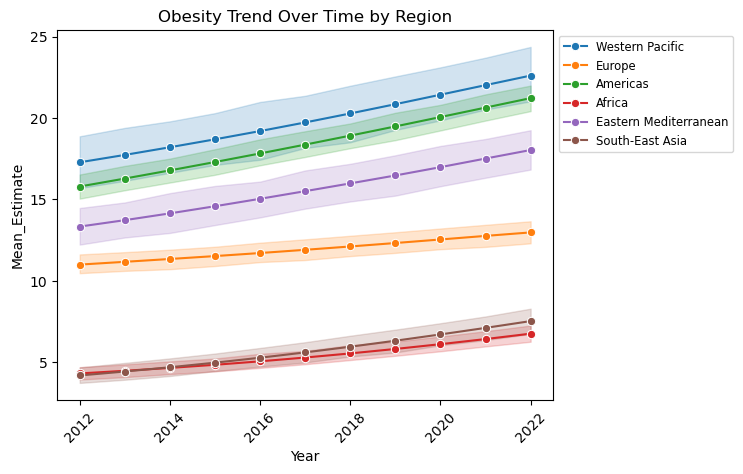

<Figure size 1600x1000 with 0 Axes>

In [51]:
sns.lineplot(data=df_filteredobesity_copy, x='Year', y='Mean_Estimate', hue='Region', marker='o')
plt.title('Obesity Trend Over Time by Region')
plt.xticks(rotation=45)
#plt.legend(loc='upper left', fontsize='small')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
plt.figure(figsize=(16,10))

plt.tight_layout()
plt.show()

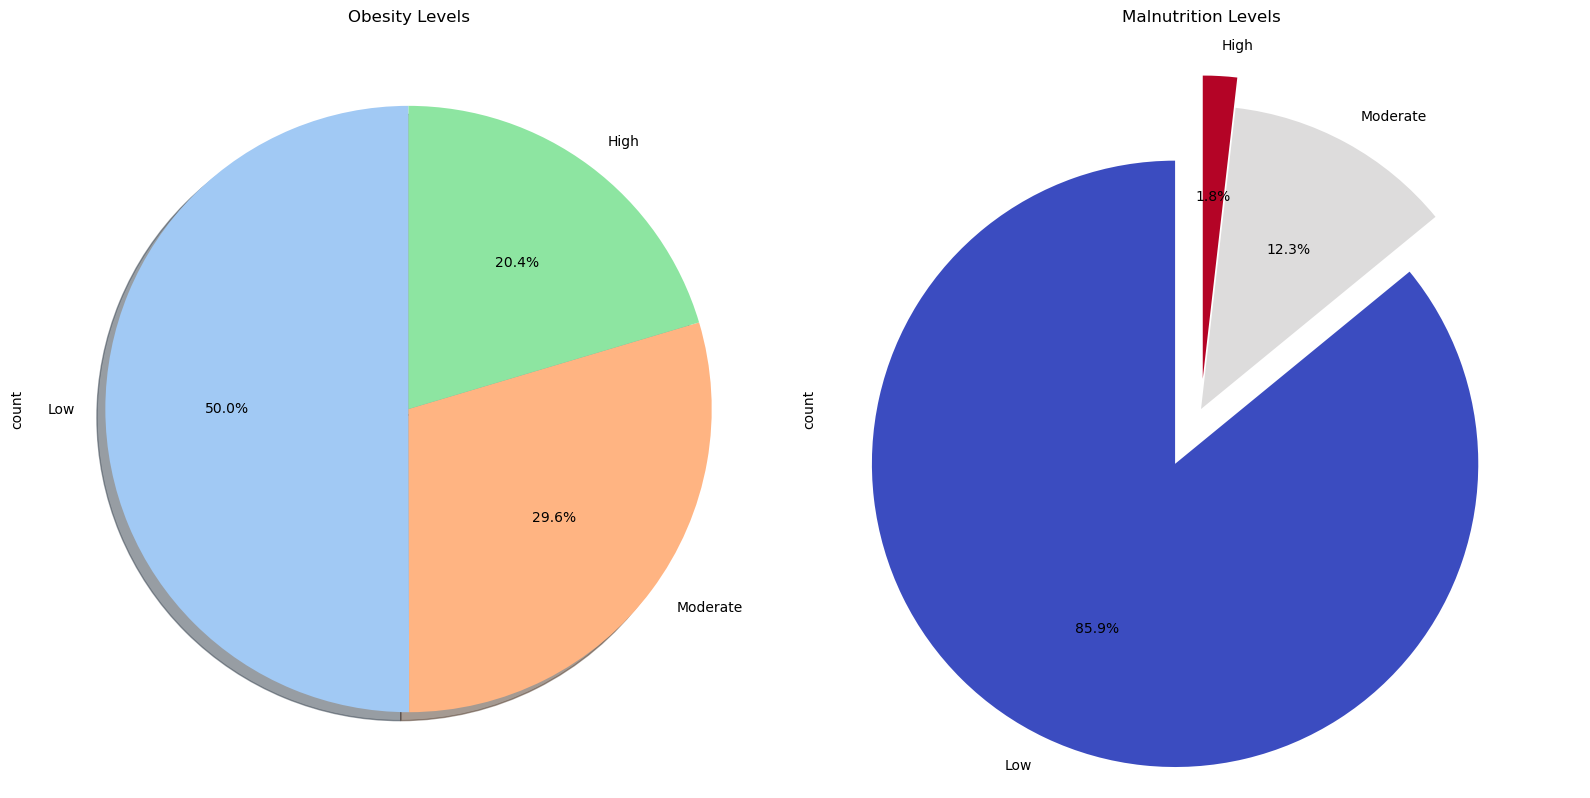

In [52]:
colors = sns.color_palette('pastel')
#colors1 = sns.color_palette('bright')

# subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 8)) 
myexplode = [0.2, 0, 0.1]

# Obesity_Level pie chart 
df_filteredobesity_copy['Obesity_Level'].value_counts().plot.pie(ax=axes[0],autopct='%1.1f%%',startangle=90,shadow=True,colors=colors)
axes[0].set_title('Obesity Levels')

# Malnutrition_Level pie chart
df_filteredmn_copy['Malnutrition_Level'].value_counts().plot.pie(ax=axes[1],autopct='%1.1f%%',startangle=90,explode = myexplode,cmap='coolwarm')
axes[1].set_title('Malnutrition Levels')

plt.tight_layout()
plt.show()

In [53]:
#df_filteredobesity_copy[df_filteredobesity_copy['Obesity_Level']=='NaN']

In [54]:
#Find the rows with 0.2% null value at Obesity_Level
#filtered = df_filteredobesity_copy[df_filteredobesity_copy['Obesity_Level'].isna()]
#filtered
#df_filteredmn_copy = df_filteredmn_copy.dropna(subset=['Obesity_Level'])

In [55]:
filtered_obs = df_filteredobesity_copy[(df_filteredobesity_copy['Year'] == 2022) & (df_filteredobesity_copy['Gender'] == 'Female')]
filtered_obs.shape

filtered_mn = df_filteredmn_copy[(df_filteredmn_copy['Year'] == 2022) & (df_filteredmn_copy['Gender'] == 'Female')]
filtered_mn.shape

(820, 11)

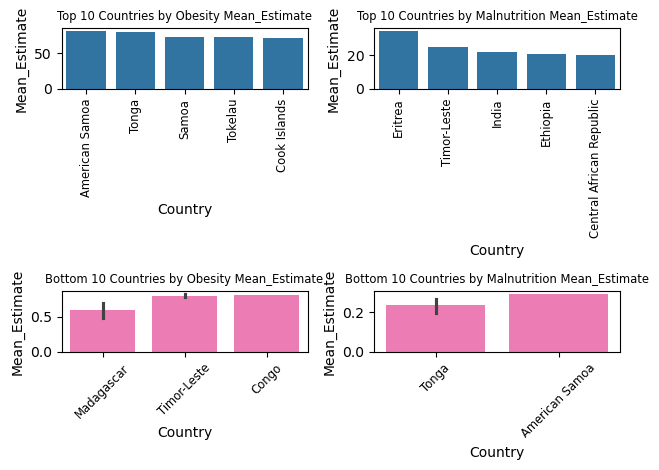

In [56]:
obdtop_countries = filtered_obs.sort_values(by=['Mean_Estimate','CI_Width'], ascending=False).head(5)
obdbottom_countries = filtered_obs.sort_values(by=['Mean_Estimate','CI_Width']).head(5)
mntop_countries = filtered_mn.sort_values(by=['Mean_Estimate','CI_Width'], ascending=False).head(5)
mnbottom_countries = filtered_mn.sort_values(by=['Mean_Estimate','CI_Width']).head(5)
#fig, axes = plt.subplots(1, 2, figsize=(16, 8))
# Combine and plot
#top_bottom = pd.concat([top_countries, bottom_countries])
plt.subplot(2, 2, 1)
sns.barplot(data=obdtop_countries, x='Country', y='Mean_Estimate')
plt.xticks(rotation=90, fontsize='small')
plt.title('Top 10 Countries by Obesity Mean_Estimate', fontsize='small')

plt.subplot(2, 2, 2)
sns.barplot(data=mntop_countries, x='Country', y='Mean_Estimate')
plt.xticks(rotation=90, fontsize='small')
plt.title('Top 10 Countries by Malnutrition Mean_Estimate', fontsize='small')

plt.subplot(2, 2, 3)
sns.barplot(data=obdbottom_countries, x='Country', y='Mean_Estimate',color='hotpink')
plt.xticks(rotation=45, fontsize='small')
plt.title('Bottom 10 Countries by Obesity Mean_Estimate', fontsize='small')

plt.subplot(2, 2, 4)
sns.barplot(data=mnbottom_countries, x='Country', y='Mean_Estimate',color='hotpink')
plt.xticks(rotation=45, fontsize='small')
plt.title('Bottom 10 Countries by Malnutrition Mean_Estimate', fontsize='small')

plt.tight_layout()
plt.show()

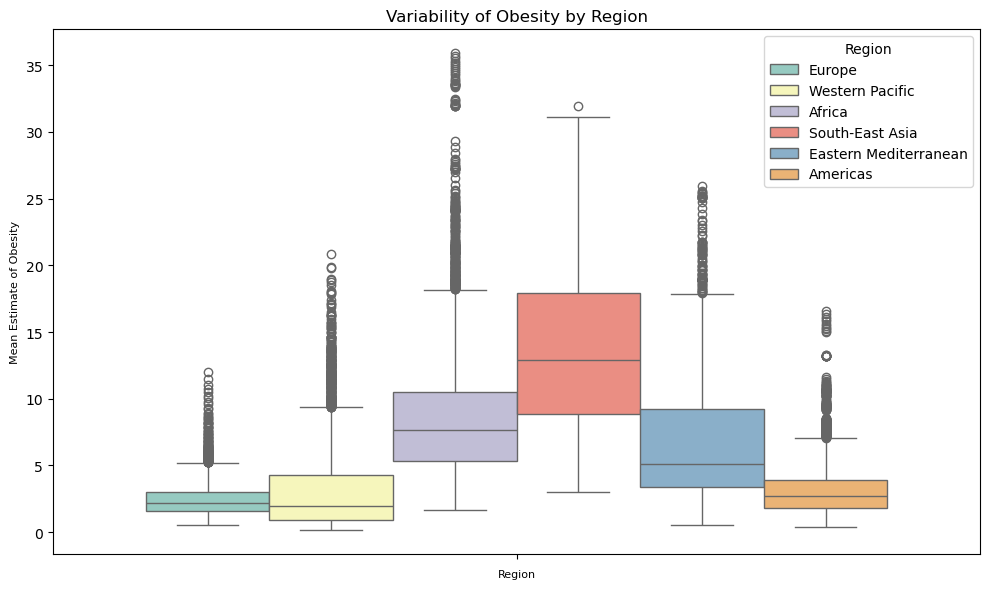

In [57]:
#Box Plot -  Variability by Region

plt.figure(figsize=(10,6))
sns.boxplot(data=df_filteredmn_copy, hue='Region', y='Mean_Estimate', palette='Set3')

plt.xlabel("Region", fontsize=8)
plt.ylabel("Mean Estimate of Obesity", fontsize=8)
plt.title('Variability of Obesity by Region', fontsize=12)
#plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

•	"The median obesity rate for Region “South East Asia Region” 
•	“Southeast Asia” has a wide IQR, indicating high variability in obesity rates."
•	The whiskers for Region Southeast Asia” showing a broad range- spread out
•	The whiskers for Region “Europe” & “America” showing concentrated range
•	Region “Africa, Western Pacific,Eastern Mediterranean,Americas and Europe “ has many outliers- inconsistency, unusually high obesity rates."


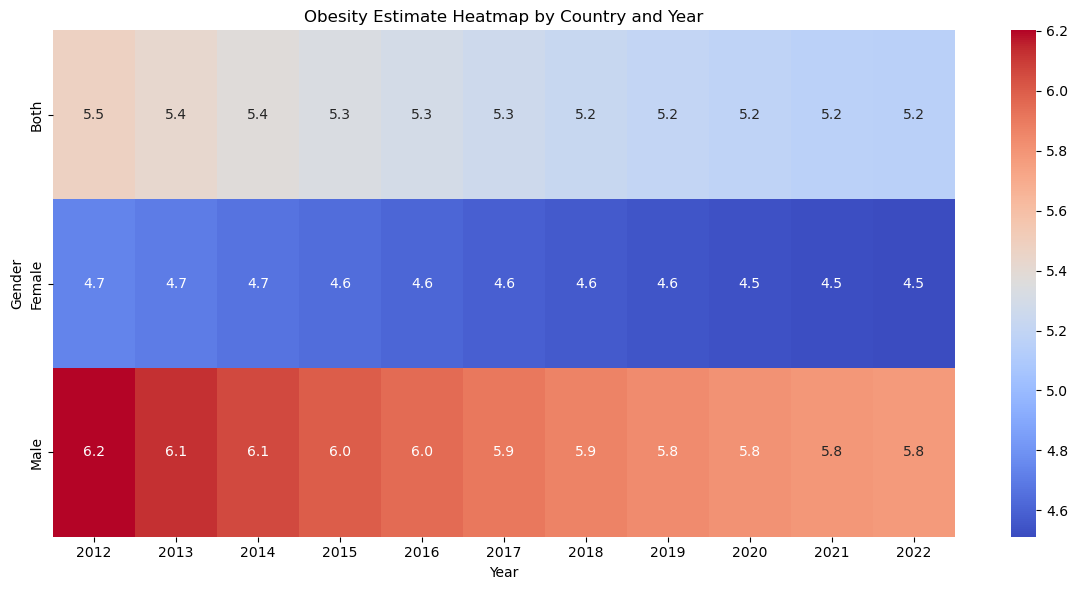

In [61]:
# Heatmap -  Patterns & Outliers
heatmap_data = df_filteredmn_copy.pivot_table(index='Gender', columns='Year', values='Mean_Estimate')

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Obesity Estimate Heatmap by Country and Year')
plt.tight_layout()
plt.show()

•	Males consistently have higher obesity estimates than females or both genders combined.
•	Females have the lowest obesity estimates, staying around 4.5–4.7.
•	For both genders combined, obesity estimates decrease slightly over the years (from 5.5 in 2012 to 5.2 in 2022).


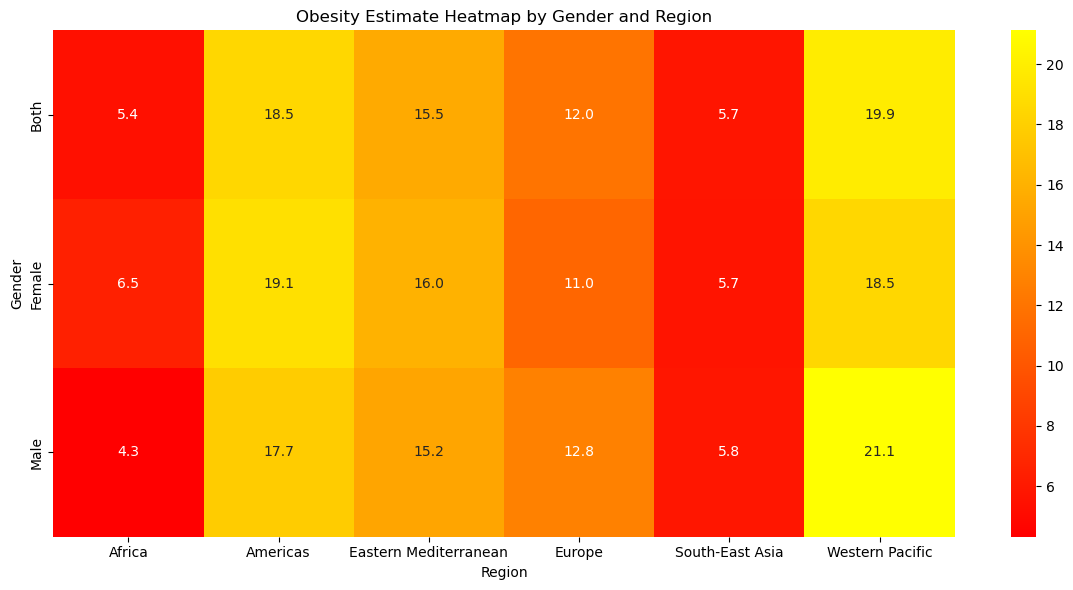

In [62]:
# Heatmap -  Obesity & Region
heatmap_data1 = df_filteredobesity_copy.pivot_table(index='Gender', columns='Region', values='Mean_Estimate')

plt.figure(figsize=(12,6))
sns.heatmap(heatmap_data1, annot=True, cmap='autumn', fmt=".1f")
plt.title('Obesity Estimate Heatmap by Gender and Region')
plt.tight_layout()
plt.show()

•	Western Pacific (Male) has the highest obesity estimate at 21.1%.
•	Africa (Male) has the lowest obesity estimate at 4.3%.
•	In most regions, females have higher obesity estimates than males; Europe has moderate values, only small gender differences
•	The Americas and Western Pacific shows the highest obesity estimates
•	South-East Asia and Africa shows the lowest estimates, lower obesity level.



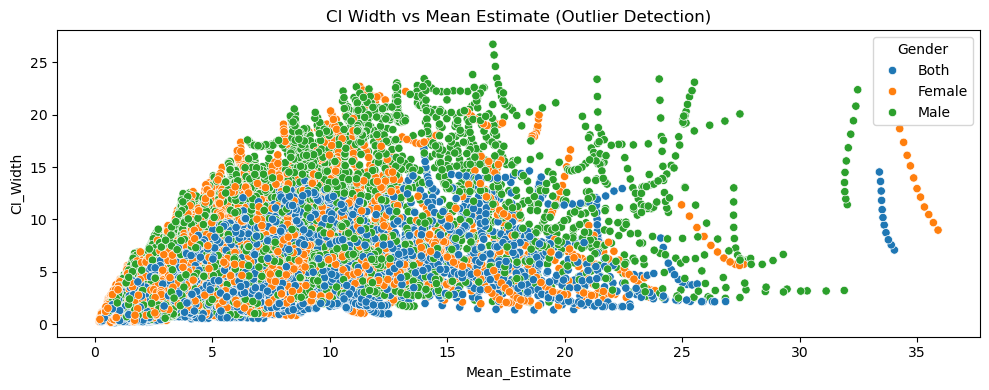

In [63]:
# Scatter Plot (CI Width vs Mean)

plt.figure(figsize=(10,4))
sns.scatterplot(data=df_filteredmn_copy, x='Mean_Estimate', y='CI_Width', hue='Gender')
plt.title('CI Width vs Mean Estimate (Outlier Detection)')
plt.tight_layout()
plt.show()


•	Positive Relationship - mean estimate increases  when  CI width generally increases 
•	Male has more spread out and have higher CI widths for lower mean estimates.
•	Female  and Both  has lower CI widths, more consistent or reliable estimates.


# SQL Connection & Table Creation

In [38]:
# *************** My SQL DB Connection *************** 
import pandas as pd
import mysql.connector
from mysql.connector import Error

try:
    connection = mysql.connector.connect (
        host='127.0.0.1',
        user='root',
        password='NewStart2025',
        database='nutritionparadox'
    )
    if connection.is_connected():
        print("SQL Connected")
        cursor = connection.cursor()

# *************** Create Table Obesity ************** '''
     
        create_obesitytable_query = """
                CREATE TABLE IF NOT EXISTS obesity (
                Country VARCHAR(250) NOT NULL,
                Region VARCHAR(250),
                Gender VARCHAR(10) NOT NULL,
                Year YEAR,
        		Mean_Estimate DECIMAL(10,6),
        		LowerBound DECIMAL(10,6),
        		UpperBound DECIMAL(10,6),
                AgeGroup VARCHAR(100) NOT NULL,
        		CI_Width DECIMAL(10,6),
        		Obesity_Level VARCHAR(100) NOT NULL
                );
        """

# *************** Create Table Malnutrition ************** '''

        create_malnutritiontable_query = """
                CREATE TABLE IF NOT EXISTS malnutrition (
                Country VARCHAR(250) NOT NULL,
                Region VARCHAR(250),
                Gender VARCHAR(10) NOT NULL,
                Year YEAR,
        		Mean_Estimate DECIMAL(10,6),
        		LowerBound DECIMAL(10,6),
        		UpperBound DECIMAL(10,6),
                AgeGroup VARCHAR(100) NOT NULL,
        		CI_Width DECIMAL(10,6),
        		Malnutrition_Level VARCHAR(100) NOT NULL
                  );
        """

   
        cursor.execute(create_obesitytable_query)
        print("Table students created sucessfully")
        cursor.execute(create_malnutritiontable_query)
        print("Table programming created sucessfully")

except Error as e:
   # print("something went wrong")
     print(f"Error: {e}")

finally:
    if connection.is_connected():
        connection.close()
    print("SQL Connection Closed")

SQL Connected
Table students created sucessfully
Table programming created sucessfully
SQL Connection Closed


# Data Export to SQL

In [39]:
from sqlalchemy import create_engine, text

# Setup
engine = create_engine("mysql+mysqlconnector://{user}:{pw}@{host}/{db}".format(host="127.0.0.1", db="nutritionparadox", user="root", pw="NewStart2025"))
#customers_df.to_sql('students', engine, if_exists='append', index=False)
try:
    insert_query_obesity = text("""
    INSERT INTO obesity
    (Country, Region, Gender, Year, Mean_Estimate, LowerBound, UpperBound, AgeGroup, CI_Width, Obesity_Level)
    VALUES (:Country, :Region, :Gender, :Year, :Mean_Estimate, :LowerBound, :UpperBound, :AgeGroup, :CI_Width, :Obesity_Level)
""")

    insert_query_malnutrition = text("""
    INSERT INTO malnutrition
    (Country, Region, Gender, Year, Mean_Estimate, LowerBound, UpperBound, AgeGroup, CI_Width, Malnutrition_Level)
    VALUES (:Country, :Region, :Gender, :Year, :Mean_Estimate, :LowerBound, :UpperBound, :AgeGroup, :CI_Width, :Malnutrition_Level)
""")

    with engine.begin() as conn:  # Auto commit
        for _, row in df_filteredobesity_copy.iterrows():
            conn.execute(insert_query_obesity, {
                "Country": row['Country'],
                "Region": row['Region'],
                "Gender": row['Gender'],
                "Year": row['Year'],
                "Mean_Estimate": row['Mean_Estimate'],
                "LowerBound": row['LowerBound'],
                "UpperBound": row['UpperBound'],
                "AgeGroup": row['Age_Group'],
                "CI_Width": row['CI_Width'],
                "Obesity_Level": row['Obesity_Level']
            })
            
        for _, row in df_filteredmn_copy.iterrows():
            conn.execute(insert_query_malnutrition, {
                "Country": row['Country'],
                "Region": row['Region'],
                "Gender": row['Gender'],
                "Year": row['Year'],
                "Mean_Estimate": row['Mean_Estimate'],
                "LowerBound": row['LowerBound'],
                "UpperBound": row['UpperBound'],
                "AgeGroup": row['Age_Group'],
                "CI_Width": row['CI_Width'],
                "Malnutrition_Level": row['Malnutrition_Level']
            })
  
    print("Successfully exported rows to both tables.")

except Exception as e:
    print("Error occurred:", e)



Successfully exported rows to both tables.


# SQL Queries

## Obesity Table (SQL Queries)

In [ ]:
#1.	Top 5 regions with the highest average obesity levels in the most recent year(2022)
SELECT
    Region, AVG(Mean_Estimate) AS avg_obesity
FROM nutritionparadox.obesity
WHERE Year = 2022 AND Mean_Estimate IS NOT NULL #AND Region IS NOT NULL
GROUP BY Region
ORDER BY avg_obesity DESC
LIMIT 5;

In [ ]:
#2.	Top 5 countries with highest obesity estimates

SELECT
    Country, AVG(UpperBound) AS avg_highestimate
FROM nutritionparadox.obesity
WHERE UpperBound IS NOT NULL #AND Region IS NOT NULL
GROUP BY Country
ORDER BY avg_highestimate DESC
LIMIT 5;

In [ ]:
# 3. Adults Obesity trend in India over the years(Mean_estimate)

SELECT
    Year, AVG(Mean_Estimate) AS avg_obesity
FROM nutritionparadox.obesity
WHERE Country = 'India' 
AND AgeGroup = 'Adults'
AND Mean_Estimate IS NOT NULL  
GROUP BY Year
ORDER BY Year ASC;

In [ ]:
#4.	Average obesity by gender and AgeGroup

SELECT
    Gender,AgeGroup,AVG(Mean_Estimate) AS avg_obesity
FROM nutritionparadox.obesity
WHERE Mean_Estimate IS NOT NULL  
GROUP BY Gender,AgeGroup
Order by Gender, AgeGroup

In [ ]:
#5.	Country count by obesity level category and age group

SELECT
    AgeGroup, Obesity_Level, COUNT(DISTINCT Country) AS country_count
FROM nutritionparadox.obesity
WHERE Obesity_Level IS NOT NULL
GROUP BY AgeGroup, Obesity_Level
ORDER BY AgeGroup, Obesity_Level;

In [ ]:
#6.	Top 5 countries least reliable countries(with highest CI_Width) and Top 5 most consistent countries (smallest average CI_Width)
(
    SELECT
        Country, AVG(CI_Width) AS avg_ci_width, 'Least Reliable' AS Category
    FROM nutritionparadox.obesity
    WHERE CI_Width IS NOT NULL
    GROUP BY Country
    ORDER BY avg_ci_width DESC
    LIMIT 5
)
UNION ALL
(
    SELECT
        Country, AVG(CI_Width) AS avg_ci_width, 'Most Consistent' AS Category
    FROM nutritionparadox.obesity
    WHERE CI_Width IS NOT NULL
    GROUP BY Country
    ORDER BY avg_ci_width ASC
    LIMIT 5
);

In [ ]:
#7.	Average obesity by age group
SELECT
    AgeGroup,AVG(Mean_Estimate) AS avg_obesity
FROM nutritionparadox.obesity
WHERE Mean_Estimate IS NOT NULL
GROUP BY AgeGroup
ORDER BY avg_obesity DESC;

In [ ]:
#8.	Top 10 Countries with consistent low obesity (low average + low CI)over the years

SELECT
    Country,AVG(Mean_Estimate) AS avg_obesity,AVG(CI_Width) AS avg_ci_width
FROM nutritionparadox.obesity
WHERE Mean_Estimate IS NOT NULL AND CI_Width IS NOT NULL
GROUP BY Country
ORDER BY avg_obesity ASC, avg_ci_width ASC
LIMIT 10;

In [ ]:
# 9.	Countries where female obesity exceeds male by large margin (same       year)
SELECT
    f.Country,f.Year,f.Mean_Estimate AS female_obesity, m.Mean_Estimate AS male_obesity,(f.Mean_Estimate - m.Mean_Estimate) AS diff
FROM nutritionparadox.obesity f
JOIN nutritionparadox.obesity m ON f.Country = m.Country AND f.Year = m.Year
WHERE f.Gender = 'Female'
AND m.Gender = 'Male'
AND (f.Mean_Estimate - m.Mean_Estimate) > 5 
ORDER BY diff DESC;

In [ ]:
#10.	Global average obesity percentage per year
SELECT
    Year,AVG(Mean_Estimate) AS global_avg_obesity
FROM nutritionparadox.obesity
WHERE Mean_Estimate IS NOT NULL
GROUP BY Year
ORDER BY Year ASC;

## Malnutrition Table (SQL Queries)

In [ ]:
#1.	Avg. malnutrition by age group
SELECT
    AgeGroup, AVG(Mean_Estimate) AS avg_malnutrition
FROM nutritionparadox.malnutrition
WHERE Mean_Estimate IS NOT NULL
GROUP BY AgeGroup
ORDER BY avg_malnutrition DESC;

In [ ]:
#2.	Top 5 countries with highest malnutrition(mean_estimate)
SELECT
    Country, AVG(Mean_Estimate) AS avg_malnutrition
FROM nutritionparadox.malnutrition
WHERE Mean_Estimate IS NOT NULL
GROUP BY Country
ORDER BY avg_malnutrition DESC
LIMIT 5;

In [ ]:
#3.	Malnutrition trend in African region over the years
SELECT
    Year,AVG(Mean_Estimate) AS avg_malnutrition
FROM nutritionparadox.malnutrition
WHERE Region = 'Africa' AND Mean_Estimate IS NOT NULL
GROUP BY Year
ORDER BY Year;

In [ ]:
#4.	Gender-based average malnutrition
SELECT
    Gender, AVG(Mean_Estimate) AS avg_malnutrition
FROM nutritionparadox.malnutrition
WHERE Mean_Estimate IS NOT NULL
GROUP BY Gender
ORDER BY avg_malnutrition DESC;

In [ ]:
#5.	Malnutrition level-wise (average CI_Width by age group)
SELECT
    AgeGroup,Malnutrition_Level,AVG(CI_Width) AS avg_ci_width
FROM nutritionparadox.malnutrition
WHERE CI_Width IS NOT NULL
GROUP BY AgeGroup, Malnutrition_Level
ORDER BY AgeGroup, Malnutrition_Level;

In [ ]:
#6.	Yearly malnutrition change in specific countries(India, Nigeria, Brazil)
SELECT
    Country,Year,AVG(Mean_Estimate) AS avg_malnutrition
FROM nutritionparadox.malnutrition
WHERE Country IN ('India', 'Nigeria', 'Brazil')
AND Mean_Estimate IS NOT NULL
GROUP BY Country, Year
ORDER BY Country, Year;

In [ ]:
#7.	Regions with lowest malnutrition averages
SELECT
    Region, AVG(Mean_Estimate) AS avg_malnutrition
FROM nutritionparadox.malnutrition
WHERE Mean_Estimate IS NOT NULL
#AND Region IS NOT NULL
GROUP BY Region
ORDER BY avg_malnutrition ASC;

In [ ]:
#Countries with increasing malnutrition (💡 Hint: Use MIN() and MAX()   on Mean_Estimate per country to compare early vs. recent malnutrition levels, and filter where the difference is positive using HAVING.)
SELECT
    Country, MIN(Mean_Estimate) AS min_malnutrition, MAX(Mean_Estimate) AS max_malnutrition, (MAX(Mean_Estimate) - MIN(Mean_Estimate)) AS change_in_malnutrition
FROM nutritionparadox.malnutrition
WHERE Mean_Estimate IS NOT NULL
GROUP BY Country
HAVING (MAX(Mean_Estimate) - MIN(Mean_Estimate)) > 0
ORDER BY change_in_malnutrition DESC;

In [ ]:
# 9. Min/Max malnutrition levels year-wise comparison
SELECT
    Year, MIN(Mean_Estimate) AS min_malnutrition, MAX(Mean_Estimate) AS max_malnutrition
FROM nutritionparadox.malnutrition
WHERE Mean_Estimate IS NOT NULL
GROUP BY Year
ORDER BY Year ASC;

In [ ]:
# 10. High CI_Width flags for monitoring(CI_width > 5)
SELECT
    Country,Region,Year,Gender,AgeGroup,CI_Width,Mean_Estimate
FROM nutritionparadox.malnutrition
WHERE CI_Width > 5
ORDER BY CI_Width DESC;

## Combined (5 Queries)

In [ ]:
#1.	Obesity vs malnutrition comparison by country(any 5 countries)
SELECT
    o.Country, AVG(o.Mean_Estimate) AS avg_obesity, AVG(m.Mean_Estimate) AS avg_malnutrition
FROM nutritionparadox.obesity o
JOIN nutritionparadox.malnutrition m ON o.Country = m.Country AND o.Year = m.Year
WHERE o.Country IN ('India', 'Nigeria', 'Brazil', 'USA', 'Mexico')
AND o.Mean_Estimate IS NOT NULL
AND m.Mean_Estimate IS NOT NULL
GROUP BY o.Country
ORDER BY o.Country;

In [ ]:
# 2.	Gender-based disparity in both obesity and malnutrition
SELECT
    Gender, AVG(Mean_Estimate) AS avg_estimate,'Obesity' AS category
FROM nutritionparadox.obesity
WHERE Mean_Estimate IS NOT NULL
GROUP BY Gender

UNION ALL

SELECT
    Gender, AVG(Mean_Estimate) AS avg_estimate,'Malnutrition' AS category
FROM nutritionparadox.malnutrition
WHERE Mean_Estimate IS NOT NULL
GROUP BY Gender;

In [ ]:
#3.	Region-wise avg estimates side-by-side(Africa and America)
SELECT
    Region, AVG(Mean_Estimate) AS avg_estimate,'Obesity' AS category
FROM nutritionparadox.obesity
WHERE Region IN ('Africa', 'America') AND Mean_Estimate IS NOT NULL
GROUP BY Region

UNION ALL

SELECT
    Region, AVG(Mean_Estimate) AS avg_estimate,'Malnutrition' AS category
FROM nutritionparadox.malnutrition
WHERE Region IN ('Africa', 'America') AND Mean_Estimate IS NOT NULL
GROUP BY Region
ORDER BY Region, category;

In [ ]:
#4.	Countries with obesity up & malnutrition down
WITH obesity_change AS (
    SELECT
        Country, MIN(Mean_Estimate) AS min_obesity,MAX(Mean_Estimate) AS max_obesity
    FROM nutritionparadox.obesity
    WHERE Mean_Estimate IS NOT NULL
    GROUP BY Country
),
malnutrition_change AS (
    SELECT
        Country,MIN(Mean_Estimate) AS min_malnutrition, MAX(Mean_Estimate) AS max_malnutrition
    FROM nutritionparadox.malnutrition
    WHERE Mean_Estimate IS NOT NULL
    GROUP BY Country
)

SELECT
    o.Country, o.min_obesity,o.max_obesity,(o.max_obesity - o.min_obesity) AS obesity_change, m.min_malnutrition, m.max_malnutrition, (m.max_malnutrition - m.min_malnutrition) AS malnutrition_change
FROM obesity_change o
JOIN malnutrition_change m ON o.Country = m.Country
WHERE (o.max_obesity - o.min_obesity) > 0   
  AND (m.max_malnutrition - m.min_malnutrition) < 0  
ORDER BY obesity_change DESC;

In [ ]:
#5.	Age-wise trend analysis from obisity
SELECT
    AgeGroup, Year, AVG(Mean_Estimate) AS avg_obesity
FROM nutritionparadox.obesity
WHERE Mean_Estimate IS NOT NULL
GROUP BY AgeGroup, Year
ORDER BY AgeGroup, Year;


In [ ]:
#5.	Age-wise trend analysis from malnutrition
SELECT
    AgeGroup, Year,AVG(Mean_Estimate) AS avg_malnutrition
FROM nutritionparadox.malnutrition
WHERE Mean_Estimate IS NOT NULL
GROUP BY AgeGroup, Year
ORDER BY AgeGroup, Year;